In [1]:
%load_ext autoreload
%autoreload 2

#%matplotlib widget
# %matplotlib inline

import matplotlib.pyplot as plt

from imaging_IO import ImagingIO
from timeLapseImaging import TimeLapseImaging
from dispersion_classes import SurfaceWaveDispersion
from utils import Dispersion, plot_xcorr
import copy

import numpy as np

In [158]:
tracking_args = {
    "detect":{
            "minprominence": 0.2,
            "minseparation": 40,
            "prominenceWindow": 600,
    }
}

In [355]:
io = ImagingIO('20221203')

In [356]:
data, x_axis, t_axis = io[13]
x0 = 650
tracking_offset = 150
start_x = x0 - tracking_offset
end_x = x0 + tracking_offset

In [357]:
imagingObj = TimeLapseImaging(data, x_axis, t_axis, method='xcorr')

tracking: 9.670494079589844


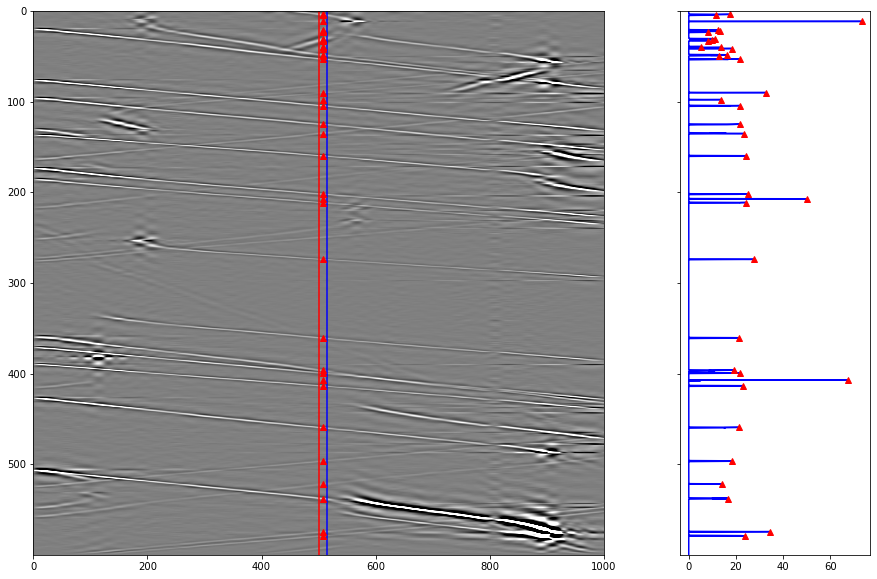

In [358]:

imagingObj.detect_cars(start_x=start_x, end_x=end_x, tracking_args=tracking_args)


In [359]:
imagingObj.select_surface_wave_windows(x0=x0, wlen_sw=20, length_sw=500, spatial_ratio=0.5, temporal_spacing=25)

In [361]:
imagingObj.visualize_tracking(plt_tlim=500, t_min=70, plt_xlim=1000, 
                              fig_dir='Fig/SEP_report', fig_name='tracking_and_window_selection.png')

Fig/SEP_report/tracking_and_window_selection.png is saved...


In [333]:
io = ImagingIO('20221202')
data, x_axis, t_axis = io[20]

In [334]:
imagingObj = TimeLapseImaging(data, x_axis, t_axis, method='xcorr')

tracking: 4.177163124084473


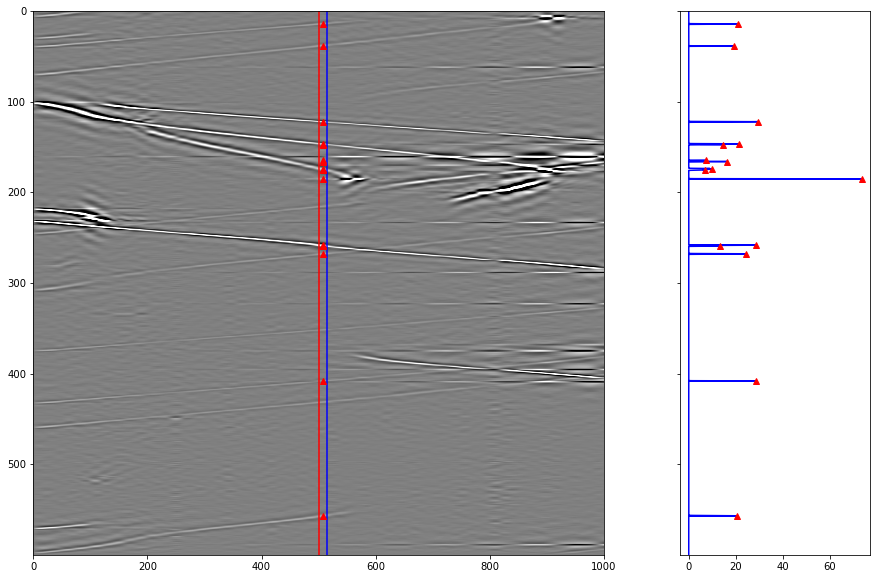

In [335]:

imagingObj.detect_cars(start_x=start_x, end_x=end_x, tracking_args=tracking_args)



In [336]:
imagingObj.select_surface_wave_windows(x0=x0, wlen_sw=20, length_sw=500, spatial_ratio=0.5, temporal_spacing=25)

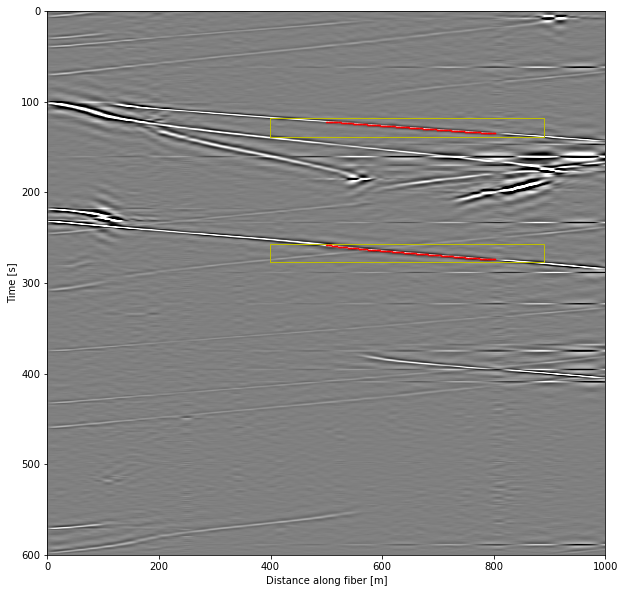

In [337]:
imagingObj.visualize_tracking(plt_tlim=600, plt_xlim=1000)

In [338]:
window = imagingObj.sw_selector[0]

In [339]:
from virtual_shot_gather import construct_shot_gather

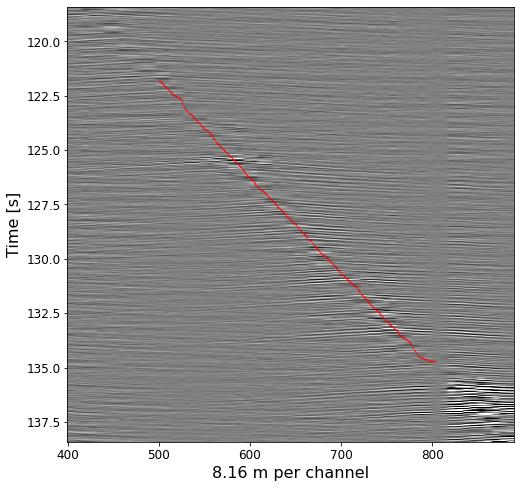

In [340]:
window.save_fig(fig_name='surfacewave_example_picked_vehicle.png', fig_dir='Fig/SEP_report/')
plt.show()

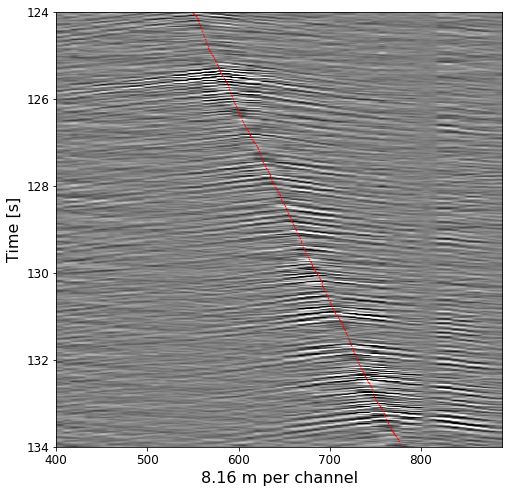

In [347]:
window.save_fig(t_min=124, t_max=134, fig_name='surfacewave_example_picked_vehicle_zoomedin.png', fig_dir='Fig/SEP_report/')
plt.show()

In [117]:
window_muted = copy.deepcopy(window)
window_muted.mute_along_traj_double_sided(offset=400, alpha=0.2)

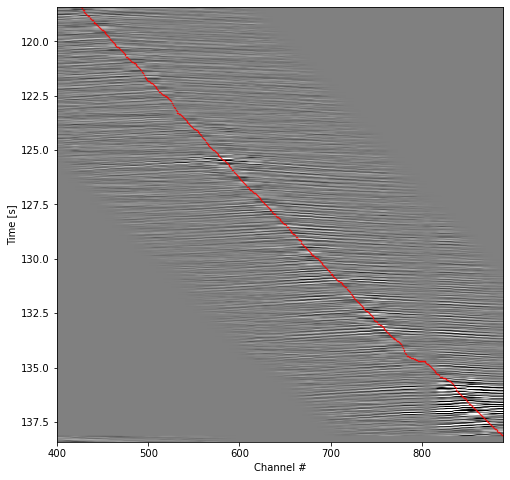

In [118]:
window_muted.save_fig()

In [119]:
from virtual_shot_gather import construct_shot_gather_other_side, construct_shot_gather

In [367]:
XCF_out, x_axis, t_axis = construct_shot_gather(window, pivot=x0, start_x=500, end_x=850, norm=False,time_window_to_xcorr=4)

Fig/SEP_report/backprop_wave_gather.png has saved...


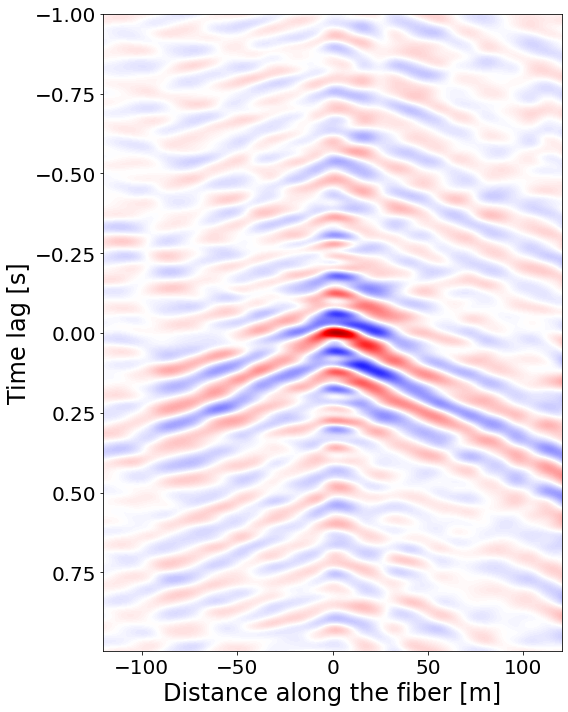

In [390]:
plot_xcorr(XCF_out, t_axis, x_axis, figsize=(8, 10), fig_dir='Fig/SEP_report', fig_name='backprop_wave_gather.png')

In [375]:
XCF_out_other_side, x_axis, t_axis = construct_shot_gather_other_side(window, pivot=x0, start_x=500, end_x=850, norm=False,time_window_to_xcorr=4)

Fig/SEP_report/forwardprop_wave_gather.png has saved...


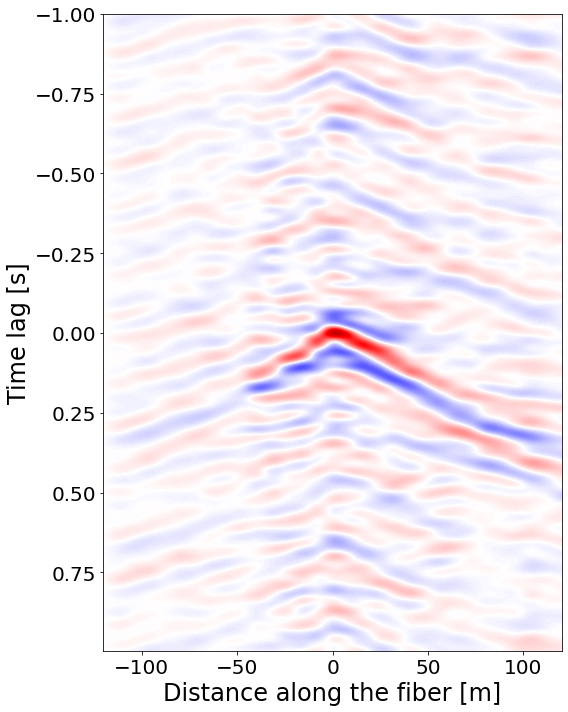

In [392]:
plot_xcorr(XCF_out_other_side, t_axis, x_axis,  figsize=(8, 10), fig_dir='Fig/SEP_report', fig_name='forwardprop_wave_gather.png')

In [377]:
XCF_out_combined = XCF_out_other_side + XCF_out

Fig/SEP_report/combined_wave_gather.png has saved...


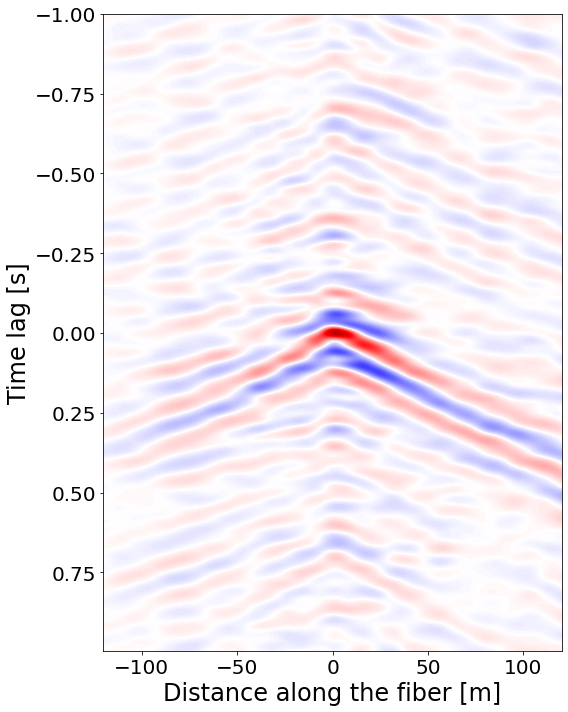

In [393]:
plot_xcorr(XCF_out_combined, t_axis, x_axis, figsize=(8, 10), fig_dir='Fig/SEP_report', fig_name='combined_wave_gather.png')

# Investigate stacking the virtual shot gathers

In [395]:
from imaging_workflow import ImagingWorkflowOneDirectory

In [396]:
workflow = ImagingWorkflowOneDirectory('20221203', method='xcorr', tracking_args=tracking_args)

In [397]:
workflow.imaging(start_x=530, end_x=900, x0=750, 
                 wlen_sw=25, length_sw=500, spatial_ratio=0.5, 
                 num_to_stop=None,
                 temporal_spacing=12,
                 imaging_kwargs={"pivot": x0, "start_x": 500, "end_x": 900, "wlen": 2,
                                "include_other_side": True})

working on window 0 / 54, method=xcorr
detecting cars...
tracking: 28.28129553794861
selecting surface-wave windows...
Isolated cars: 4; accumulated isolated cars: 4...
computing disp images...
averaging...
time lapse:  36.09s
working on window 1 / 54, method=xcorr
detecting cars...
tracking: 28.140135526657104
selecting surface-wave windows...
Isolated cars: 6; accumulated isolated cars: 10...
computing disp images...
averaging...
time lapse:  35.94s
working on window 2 / 54, method=xcorr
detecting cars...
tracking: 24.48564386367798
selecting surface-wave windows...
Isolated cars: 9; accumulated isolated cars: 19...
computing disp images...


/net/server/sep/syyuan/projects/car_based_time_lapse_imaging/virtual_shot_gather.py:136: RuntimeWarning: invalid value encountered in true_divide
  XCF_out /= np.amax(XCF_out[pivot_idx - start_x_idx])


averaging...
time lapse:  32.30s
working on window 3 / 54, method=xcorr
detecting cars...
tracking: 22.514686584472656
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 26...
computing disp images...
averaging...
time lapse:  30.30s
working on window 4 / 54, method=xcorr
detecting cars...
tracking: 17.878543376922607
selecting surface-wave windows...
Isolated cars: 6; accumulated isolated cars: 32...
computing disp images...
averaging...
time lapse:  25.19s
working on window 5 / 54, method=xcorr
detecting cars...
tracking: 29.37166404724121
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 39...
computing disp images...
averaging...
time lapse:  37.16s
working on window 6 / 54, method=xcorr
detecting cars...
tracking: 23.61922836303711
selecting surface-wave windows...
Isolated cars: 8; accumulated isolated cars: 47...
computing disp images...
averaging...
time lapse:  31.38s
working on window 7 / 54, method=xcorr
detecting cars

working on window 41 / 54, method=xcorr
detecting cars...
tracking: 4.650020599365234
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 135...
computing disp images...
averaging...
time lapse:  11.24s
working on window 42 / 54, method=xcorr
detecting cars...
tracking: 5.618741989135742
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 137...
computing disp images...
averaging...
time lapse:  12.19s
working on window 43 / 54, method=xcorr
detecting cars...
tracking: 7.16601824760437
selecting surface-wave windows...
Isolated cars: 3; accumulated isolated cars: 140...
computing disp images...
averaging...
time lapse:  13.89s
working on window 44 / 54, method=xcorr
detecting cars...
tracking: 2.973615884780884
selecting surface-wave windows...
working on window 45 / 54, method=xcorr
detecting cars...
tracking: 1.2873363494873047
selecting surface-wave windows...
working on window 46 / 54, method=xcorr
detecting cars...
tracking: 8.

In [398]:
workflow.plot_intermediate_images()

saving Fig/dispersion/20221203/vs_time_0m_nCars_4.png...
disp_time_0m_nCars_4.png
saving Fig/dispersion/20221203/disp_time_0m_nCars_4.png...
saving Fig/dispersion/20221203/vs_time_30m_nCars_19.png...
disp_time_30m_nCars_19.png
saving Fig/dispersion/20221203/disp_time_30m_nCars_19.png...
saving Fig/dispersion/20221203/vs_time_60m_nCars_39.png...
disp_time_60m_nCars_39.png
saving Fig/dispersion/20221203/disp_time_60m_nCars_39.png...
saving Fig/dispersion/20221203/vs_time_90m_nCars_62.png...
disp_time_90m_nCars_62.png
saving Fig/dispersion/20221203/disp_time_90m_nCars_62.png...
saving Fig/dispersion/20221203/vs_time_120m_nCars_77.png...
disp_time_120m_nCars_77.png
saving Fig/dispersion/20221203/disp_time_120m_nCars_77.png...
saving Fig/dispersion/20221203/vs_time_150m_nCars_92.png...
disp_time_150m_nCars_92.png
saving Fig/dispersion/20221203/disp_time_150m_nCars_92.png...
saving Fig/dispersion/20221203/vs_time_180m_nCars_111.png...
disp_time_180m_nCars_111.png
saving Fig/dispersion/202212

In [399]:
workflow = ImagingWorkflowOneDirectory('20221203', method='xcorr', tracking_args=tracking_args)

In [400]:
workflow.imaging(start_x=530, end_x=900, x0=700, 
                 wlen_sw=25, length_sw=500, spatial_ratio=0.5, 
                 num_to_stop=None,
                 temporal_spacing=12,
                 imaging_kwargs={"pivot": x0, "start_x": 500, "end_x": 900, "wlen": 2,
                                "include_other_side": True})

working on window 0 / 54, method=xcorr
detecting cars...
tracking: 27.753785610198975
selecting surface-wave windows...
Isolated cars: 4; accumulated isolated cars: 4...
computing disp images...
averaging...
time lapse:  35.06s
working on window 1 / 54, method=xcorr
detecting cars...
tracking: 27.632925271987915
selecting surface-wave windows...
Isolated cars: 6; accumulated isolated cars: 10...
computing disp images...
averaging...
time lapse:  34.93s
working on window 2 / 54, method=xcorr
detecting cars...
tracking: 23.831501245498657
selecting surface-wave windows...
Isolated cars: 9; accumulated isolated cars: 19...
computing disp images...
averaging...
time lapse:  31.18s
working on window 3 / 54, method=xcorr
detecting cars...
tracking: 21.899239778518677
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 26...
computing disp images...
averaging...
time lapse:  29.24s
working on window 4 / 54, method=xcorr
detecting cars...
tracking: 17.39481544494629


working on window 38 / 54, method=xcorr
detecting cars...
tracking: 1.3195652961730957
selecting surface-wave windows...
working on window 39 / 54, method=xcorr
detecting cars...
tracking: 2.184880256652832
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 137...
computing disp images...
averaging...
time lapse:  8.99s
working on window 40 / 54, method=xcorr
detecting cars...
tracking: 1.3192417621612549
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 138...
computing disp images...
averaging...
time lapse:  8.12s
working on window 41 / 54, method=xcorr
detecting cars...
tracking: 4.725700616836548
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 139...
computing disp images...
averaging...
time lapse:  11.50s
working on window 42 / 54, method=xcorr
detecting cars...
tracking: 5.667526006698608
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 141...
computing disp ima

Fig/dispersion/20221203/vs_time_0m_nCars_4.png has saved...
disp_time_0m_nCars_4.png
0.9978092908859253 0.17229631155729294
saving Fig/dispersion/20221203/disp_time_0m_nCars_4.png...
Fig/dispersion/20221203/vs_time_30m_nCars_19.png has saved...
disp_time_30m_nCars_19.png
0.9981799781322479 0.1854145896434784
saving Fig/dispersion/20221203/disp_time_30m_nCars_19.png...
Fig/dispersion/20221203/vs_time_60m_nCars_41.png has saved...
disp_time_60m_nCars_41.png
0.9984184086322785 0.1747558829188347
saving Fig/dispersion/20221203/disp_time_60m_nCars_41.png...
Fig/dispersion/20221203/vs_time_90m_nCars_64.png has saved...
disp_time_90m_nCars_64.png
0.9982315993309021 0.18315693229436875
saving Fig/dispersion/20221203/disp_time_90m_nCars_64.png...
Fig/dispersion/20221203/vs_time_120m_nCars_82.png has saved...
disp_time_120m_nCars_82.png
0.9978246998786926 0.189244584441185
saving Fig/dispersion/20221203/disp_time_120m_nCars_82.png...
Fig/dispersion/20221203/vs_time_150m_nCars_97.png has saved...

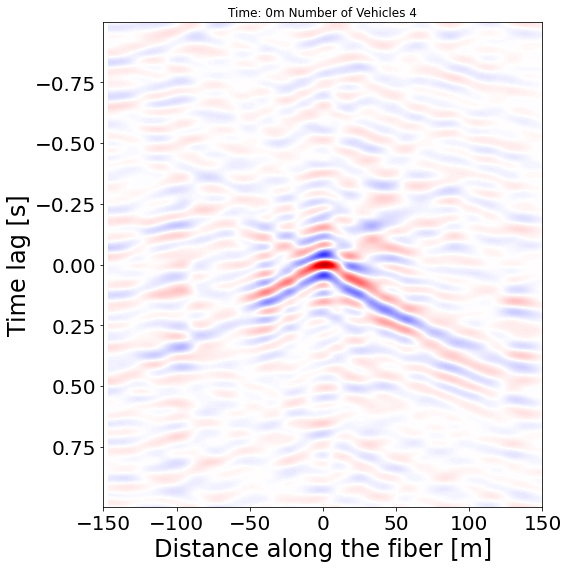

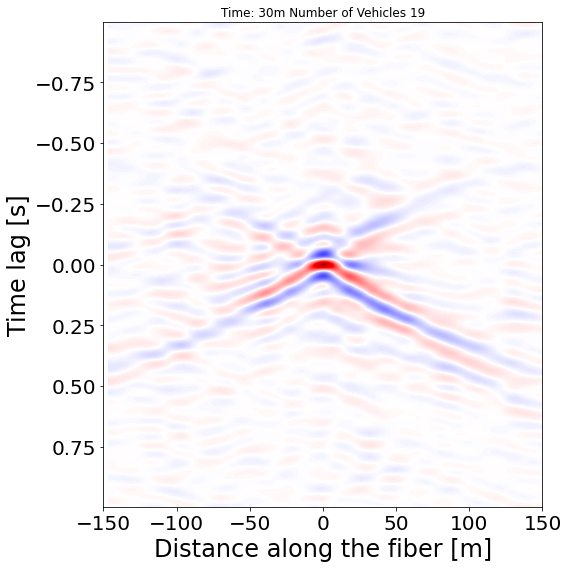

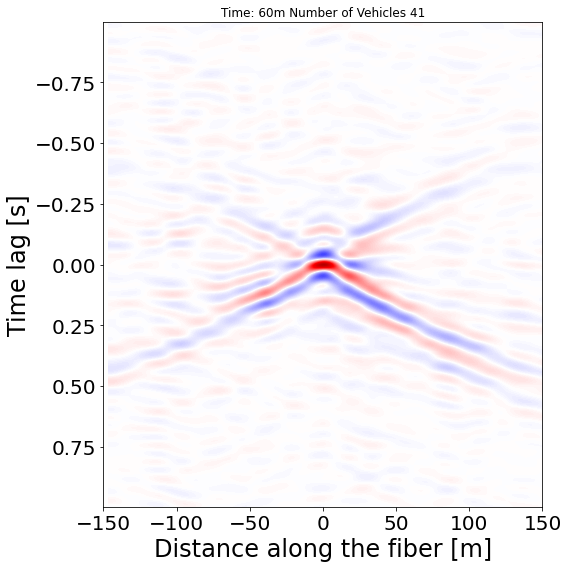

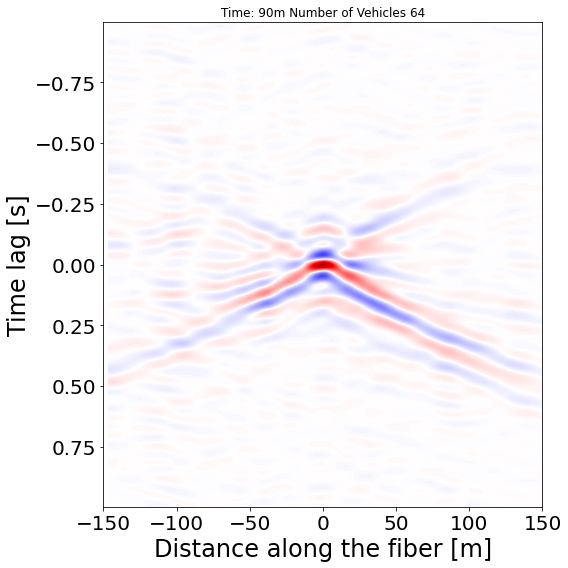

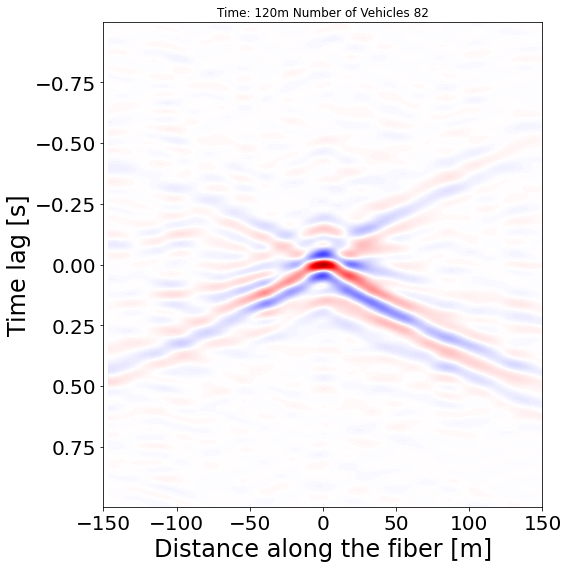

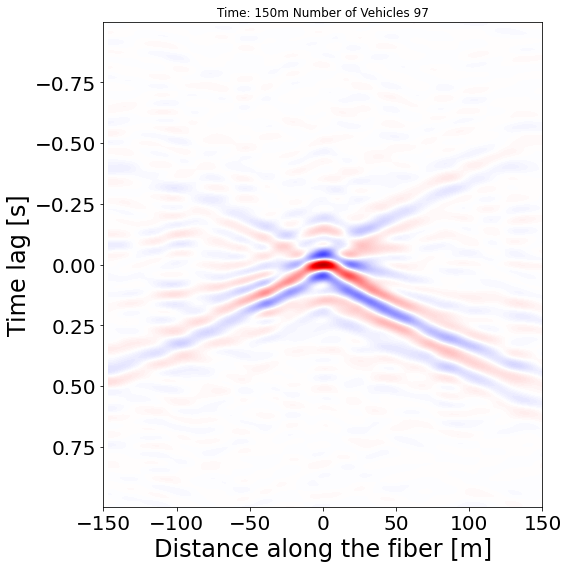

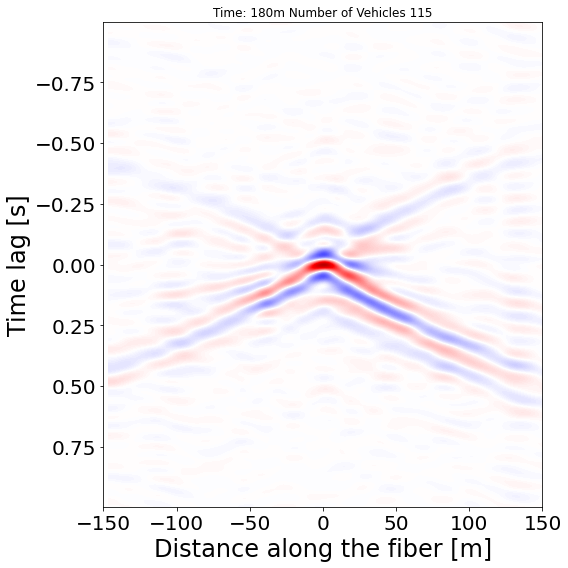

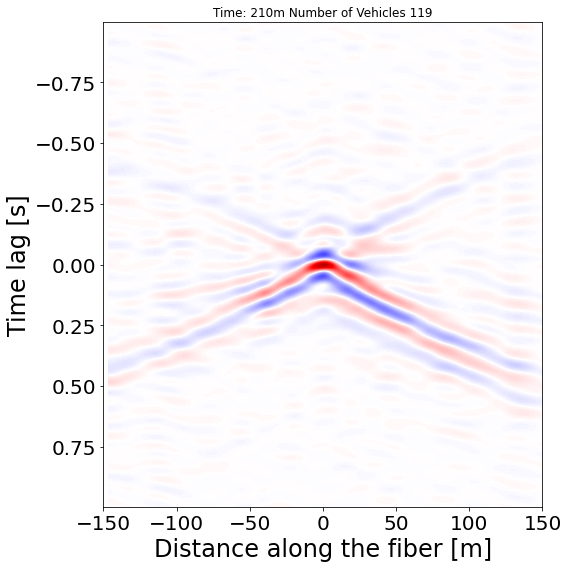

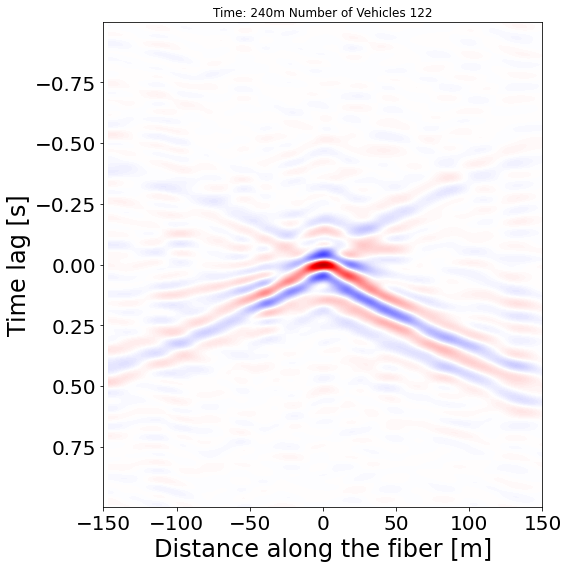

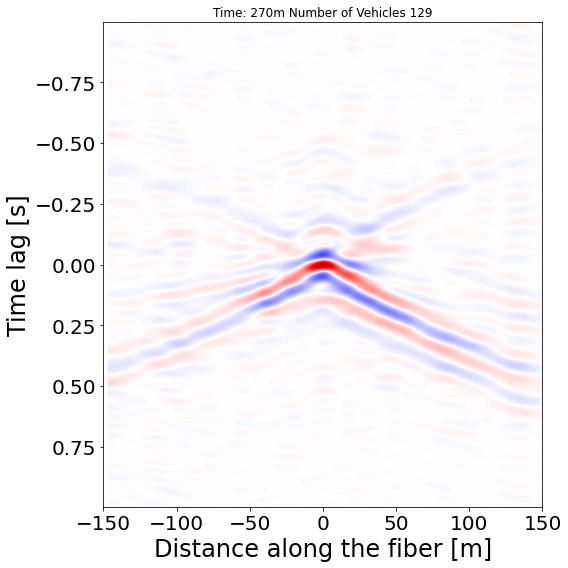

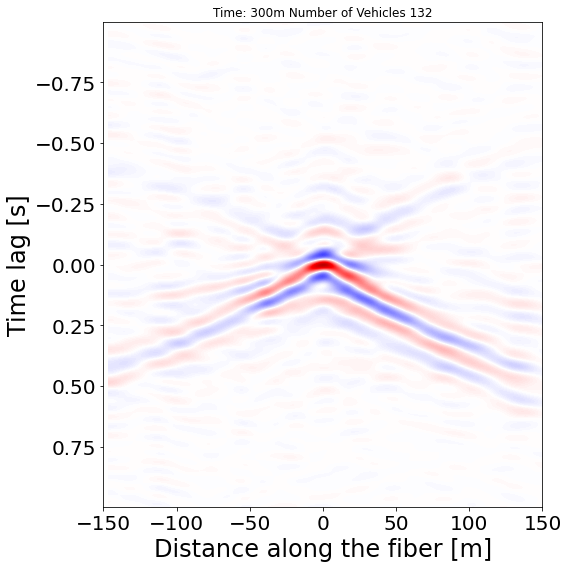

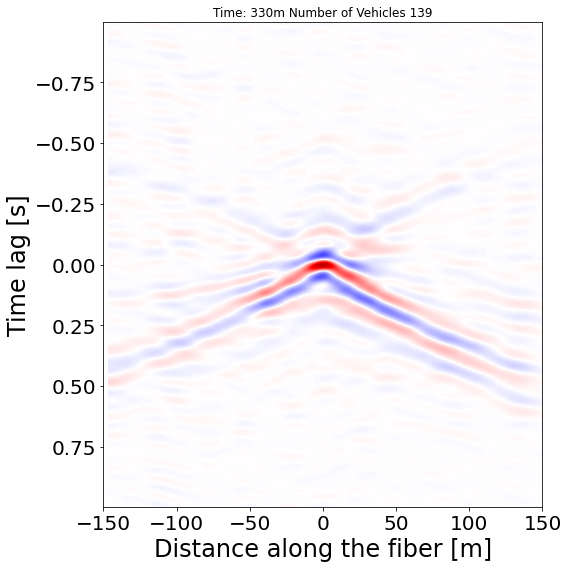

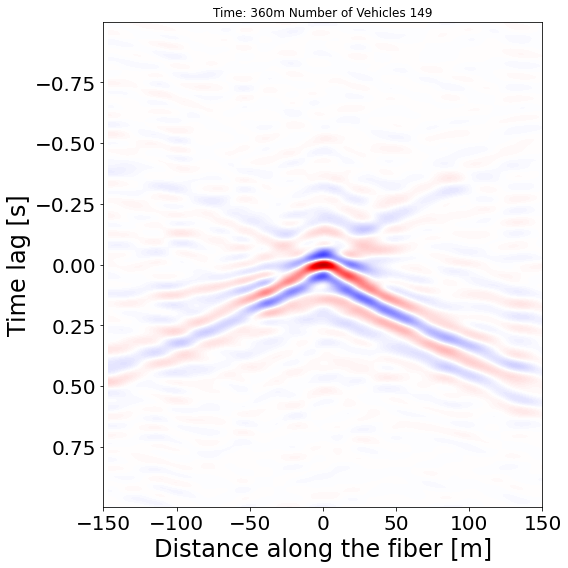

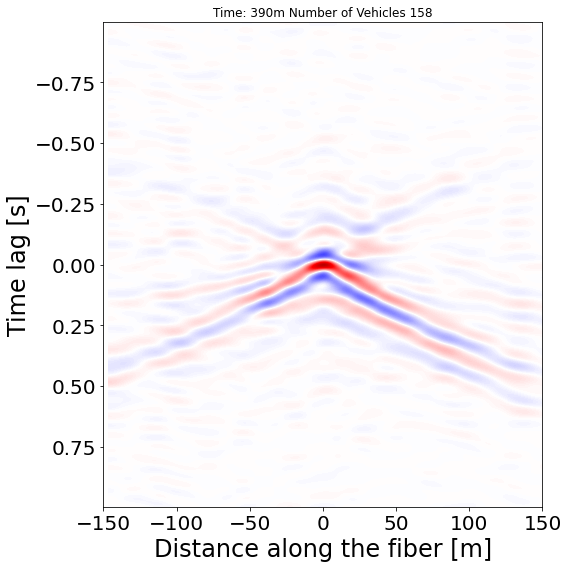

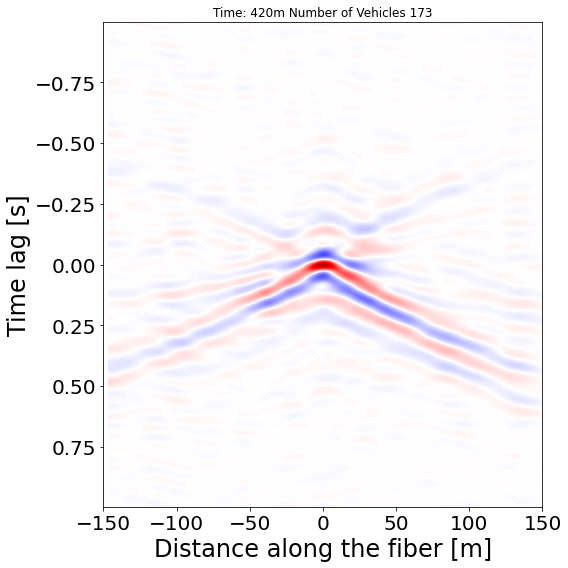

In [406]:
workflow.plot_intermediate_images()

# Spatial heterogeneity

In [408]:
imaging_offset = 150

In [412]:
def workflow_for_x0(x0, date='20221203'):
    workflow = ImagingWorkflowOneDirectory(date, method='xcorr', tracking_args=tracking_args)
    workflow.imaging(start_x=x0 - tracking_offset, end_x=x0 + tracking_offset, x0=x0, 
                 wlen_sw=25, length_sw=500, spatial_ratio=0.5, 
                 num_to_stop=None,
                 temporal_spacing=12,
                 imaging_kwargs={"pivot": x0, "start_x": x0-imaging_offset, "end_x": x0+imaging_offset, "wlen": 2,
                                "include_other_side": True})
    return workflow

In [413]:
grass_x0 = 200

workflow = workflow_for_x0(grass_x0)

working on window 0 / 54, method=xcorr
detecting cars...
tracking: 25.306430339813232
selecting surface-wave windows...
Isolated cars: 5; accumulated isolated cars: 5...
computing disp images...
averaging...
time lapse:  32.82s
working on window 1 / 54, method=xcorr
detecting cars...
tracking: 16.029635906219482
selecting surface-wave windows...
Isolated cars: 5; accumulated isolated cars: 10...
computing disp images...
averaging...
time lapse:  23.76s
working on window 2 / 54, method=xcorr
detecting cars...
tracking: 20.31102418899536
selecting surface-wave windows...
Isolated cars: 3; accumulated isolated cars: 13...
computing disp images...
averaging...
time lapse:  27.93s
working on window 3 / 54, method=xcorr
detecting cars...
tracking: 25.84770154953003
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 20...
computing disp images...
averaging...
time lapse:  33.85s
working on window 4 / 54, method=xcorr
detecting cars...
tracking: 18.917075395584106
s

working on window 43 / 54, method=xcorr
detecting cars...
tracking: 9.84876012802124
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 103...
computing disp images...
averaging...
time lapse:  17.04s
working on window 44 / 54, method=xcorr
detecting cars...
tracking: 1.1457796096801758
selecting surface-wave windows...
working on window 45 / 54, method=xcorr
detecting cars...
tracking: 3.5658020973205566
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 104...
computing disp images...
averaging...
time lapse:  10.48s
working on window 46 / 54, method=xcorr
detecting cars...
tracking: 7.569796085357666
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 106...
computing disp images...
averaging...
time lapse:  14.80s
working on window 47 / 54, method=xcorr
detecting cars...
tracking: 6.46256947517395
selecting surface-wave windows...
Isolated cars: 3; accumulated isolated cars: 109...
computing disp ima

Fig/dispersion/20221203/vs_time_0m_nCars_5.png has saved...
disp_time_0m_nCars_5.png
0.9955445110797883 0.1518267634510994
saving Fig/dispersion/20221203/disp_time_0m_nCars_5.png...
Fig/dispersion/20221203/vs_time_30m_nCars_13.png has saved...
disp_time_30m_nCars_13.png
0.9958925664424896 0.12373890548944473
saving Fig/dispersion/20221203/disp_time_30m_nCars_13.png...
Fig/dispersion/20221203/vs_time_60m_nCars_26.png has saved...
disp_time_60m_nCars_26.png
0.9967230498790741 0.14802223443984985
saving Fig/dispersion/20221203/disp_time_60m_nCars_26.png...
Fig/dispersion/20221203/vs_time_90m_nCars_48.png has saved...
disp_time_90m_nCars_48.png
0.9962484884262085 0.13969614773988723
saving Fig/dispersion/20221203/disp_time_90m_nCars_48.png...
Fig/dispersion/20221203/vs_time_120m_nCars_60.png has saved...
disp_time_120m_nCars_60.png
0.9968393504619598 0.11373601838946343
saving Fig/dispersion/20221203/disp_time_120m_nCars_60.png...
Fig/dispersion/20221203/vs_time_150m_nCars_74.png has saved

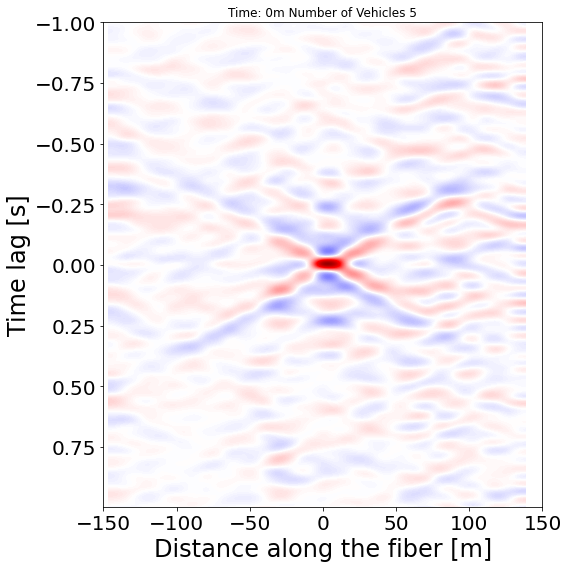

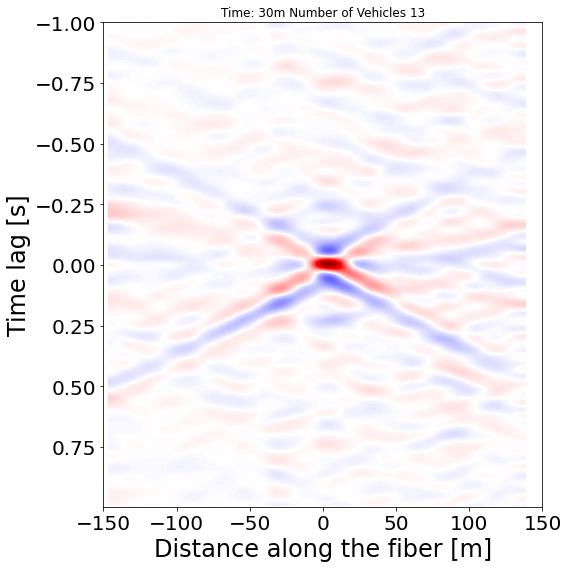

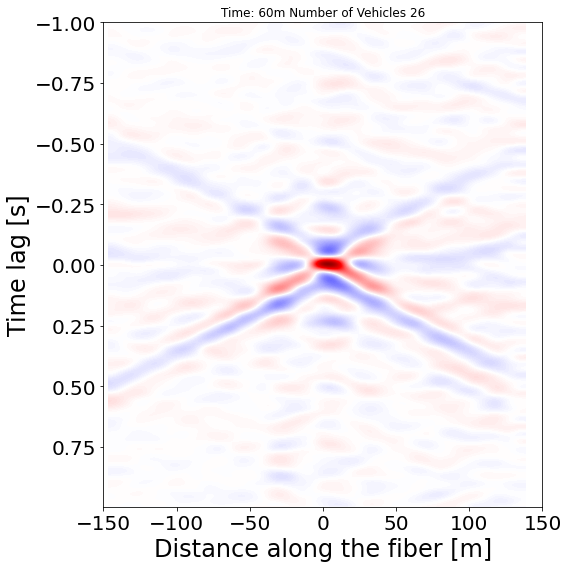

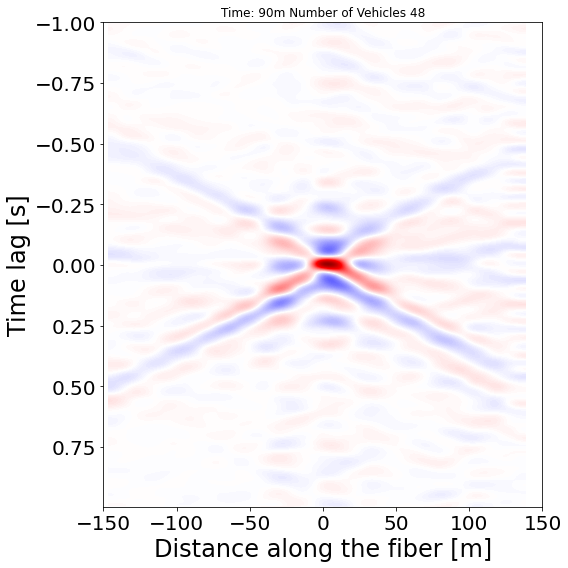

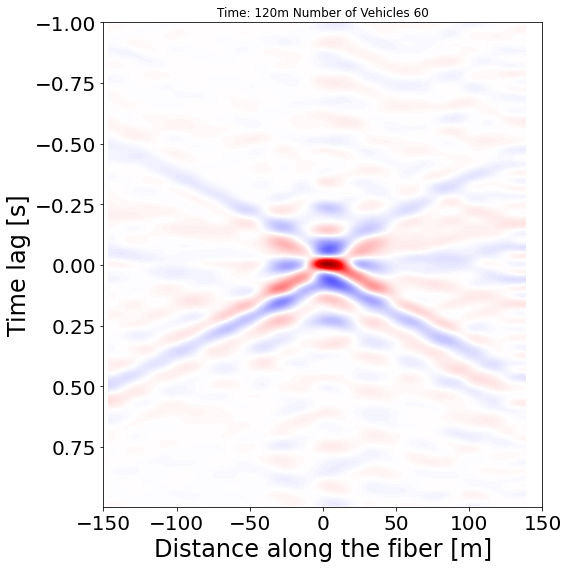

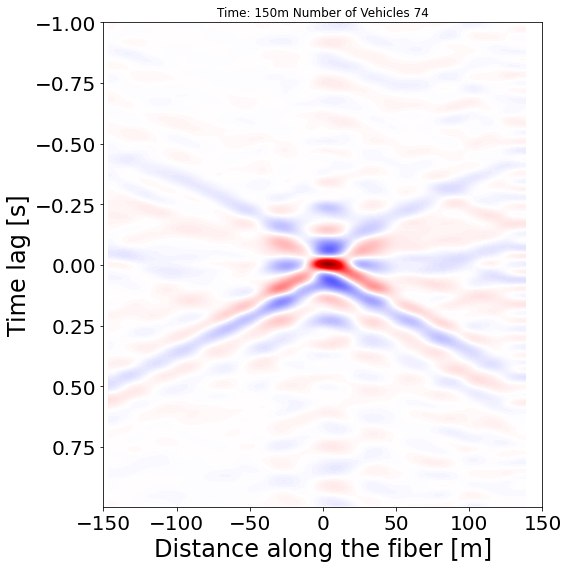

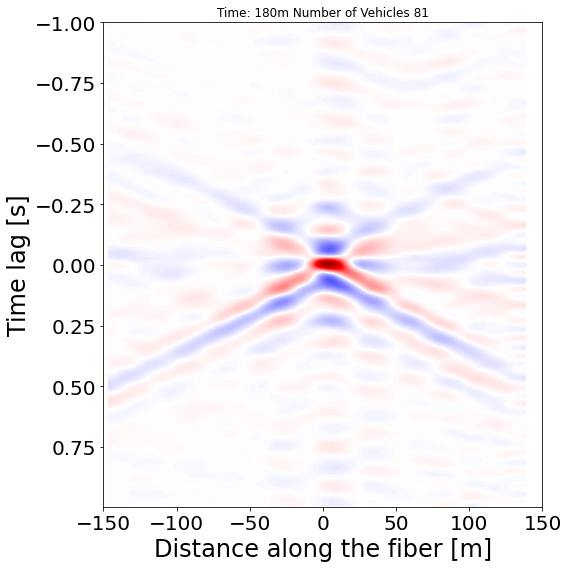

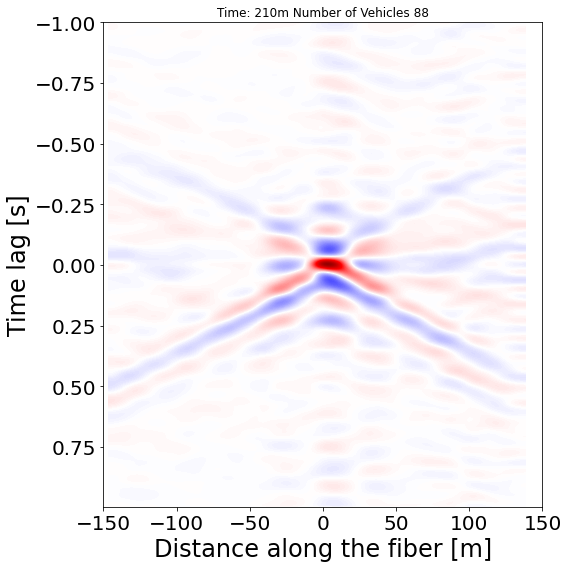

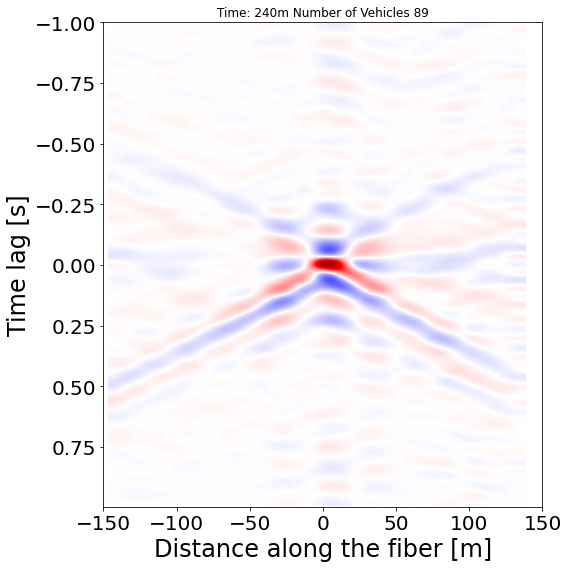

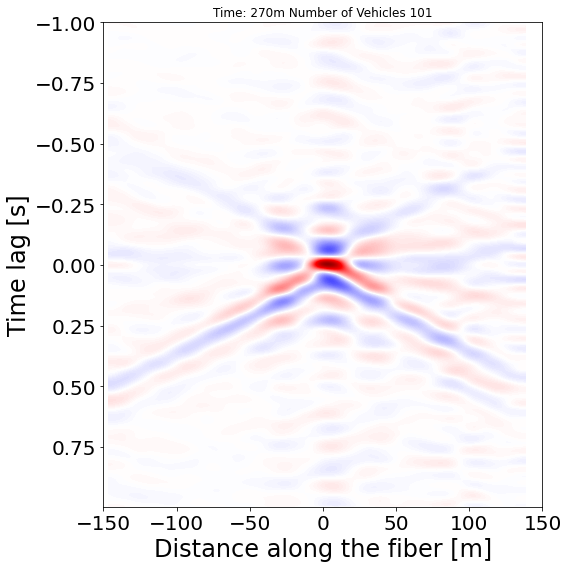

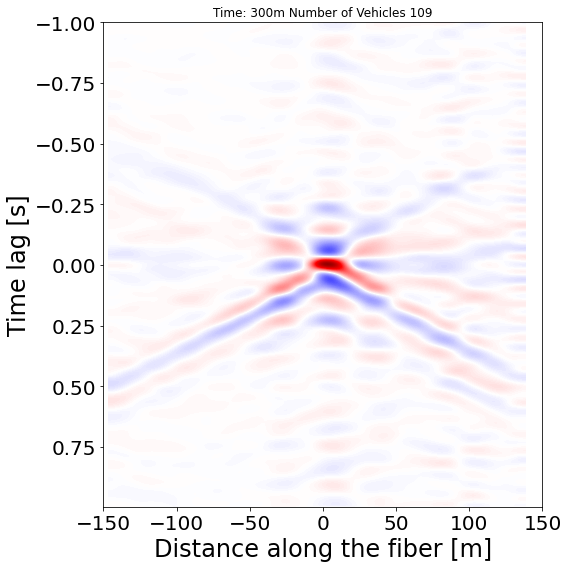

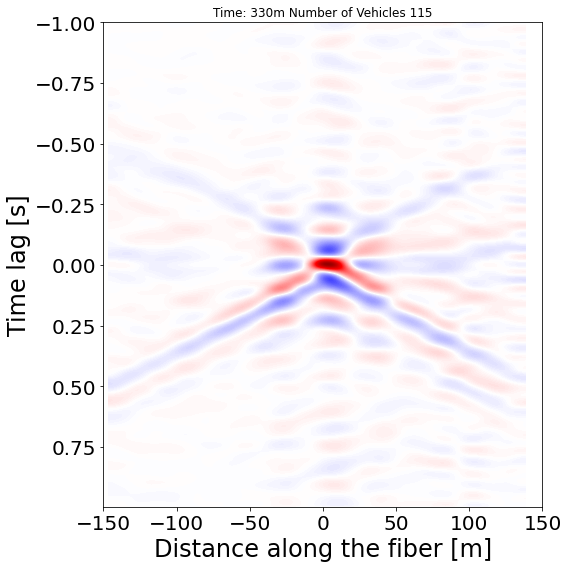

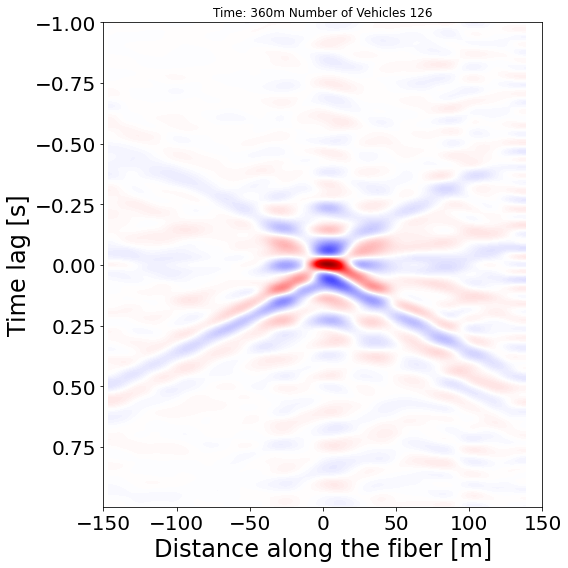

In [415]:
workflow.plot_intermediate_images()

In [417]:
bifurcation_x0 = 600
bifur_workflow = workflow_for_x0(bifurcation_x0, date='20221223')

working on window 0 / 54, method=xcorr
detecting cars...
tracking: 18.742390394210815
selecting surface-wave windows...
Isolated cars: 6; accumulated isolated cars: 6...
computing disp images...
averaging...
time lapse:  26.50s
working on window 1 / 54, method=xcorr
detecting cars...
tracking: 19.76185369491577
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 13...
computing disp images...
averaging...
time lapse:  27.71s
working on window 2 / 54, method=xcorr
detecting cars...
tracking: 17.429848670959473
selecting surface-wave windows...
Isolated cars: 8; accumulated isolated cars: 21...
computing disp images...
averaging...
time lapse:  25.34s
working on window 3 / 54, method=xcorr
detecting cars...
tracking: 11.722846746444702
selecting surface-wave windows...
Isolated cars: 4; accumulated isolated cars: 25...
computing disp images...
averaging...
time lapse:  19.22s
working on window 4 / 54, method=xcorr
detecting cars...
tracking: 10.023096323013306


working on window 37 / 54, method=xcorr
detecting cars...
tracking: 3.1333529949188232
selecting surface-wave windows...
Isolated cars: 4; accumulated isolated cars: 151...
computing disp images...
averaging...
time lapse:  10.25s
working on window 38 / 54, method=xcorr
detecting cars...
tracking: 0.8697409629821777
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 152...
computing disp images...
averaging...
time lapse:  7.75s
working on window 39 / 54, method=xcorr
detecting cars...
tracking: 3.420194625854492
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 153...
computing disp images...
averaging...
time lapse:  10.37s
working on window 40 / 54, method=xcorr
detecting cars...
tracking: 4.198490381240845
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 155...
computing disp images...
averaging...
time lapse:  11.19s
working on window 41 / 54, method=xcorr
detecting cars...
tracking: 1.430289745

Fig/dispersion/20221223/vs_time_0m_nCars_6.png has saved...
disp_time_0m_nCars_6.png
0.9983677875995636 0.1669616922736168
saving Fig/dispersion/20221223/disp_time_0m_nCars_6.png...
Fig/dispersion/20221223/vs_time_30m_nCars_21.png has saved...
disp_time_30m_nCars_21.png
0.9973929107189179 0.15947386771440505
saving Fig/dispersion/20221223/disp_time_30m_nCars_21.png...
Fig/dispersion/20221223/vs_time_60m_nCars_36.png has saved...
disp_time_60m_nCars_36.png
0.9985027921199798 0.1728986382484436
saving Fig/dispersion/20221223/disp_time_60m_nCars_36.png...
Fig/dispersion/20221223/vs_time_90m_nCars_58.png has saved...
disp_time_90m_nCars_58.png
0.998665337562561 0.17656190723180773
saving Fig/dispersion/20221223/disp_time_90m_nCars_58.png...
Fig/dispersion/20221223/vs_time_120m_nCars_76.png has saved...
disp_time_120m_nCars_76.png
0.9987089049816131 0.17817560076713562
saving Fig/dispersion/20221223/disp_time_120m_nCars_76.png...
Fig/dispersion/20221223/vs_time_150m_nCars_92.png has saved..

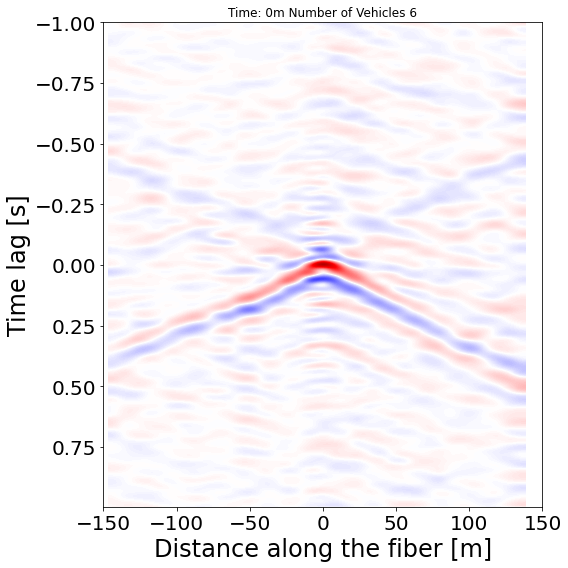

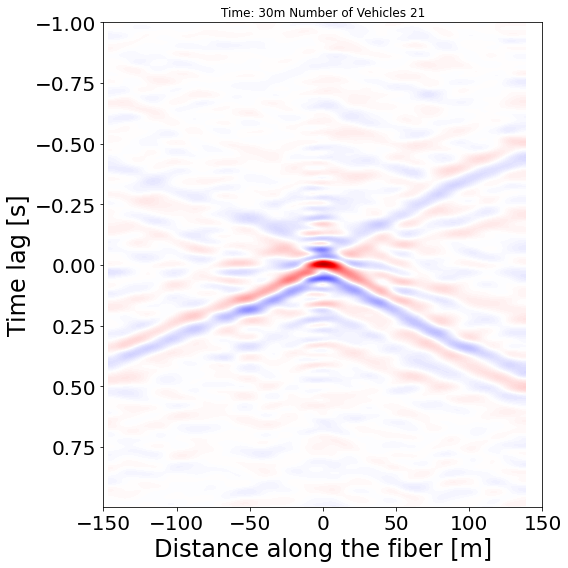

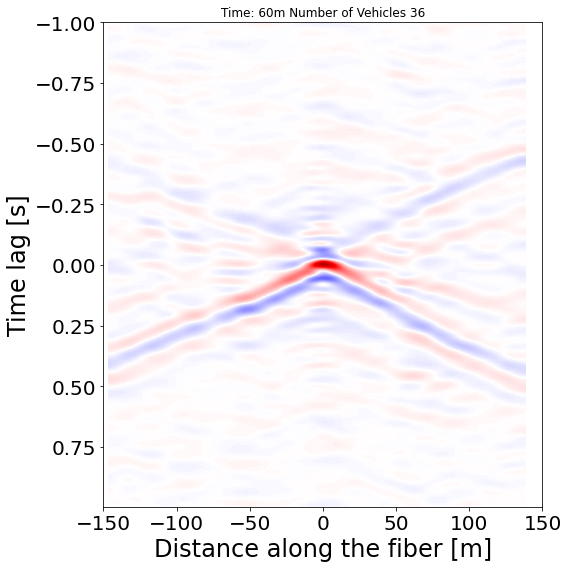

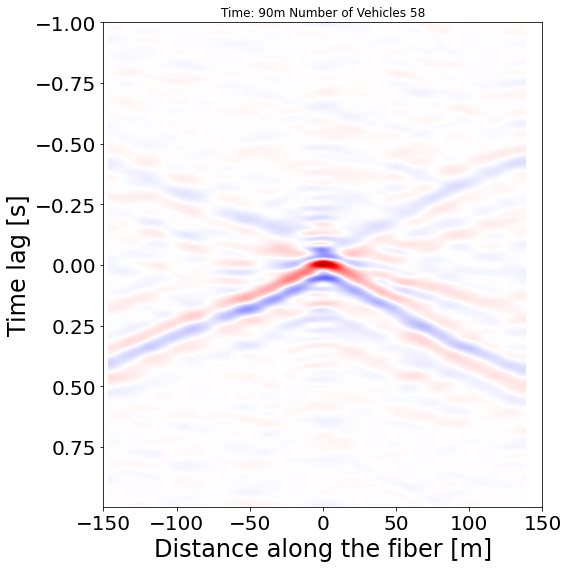

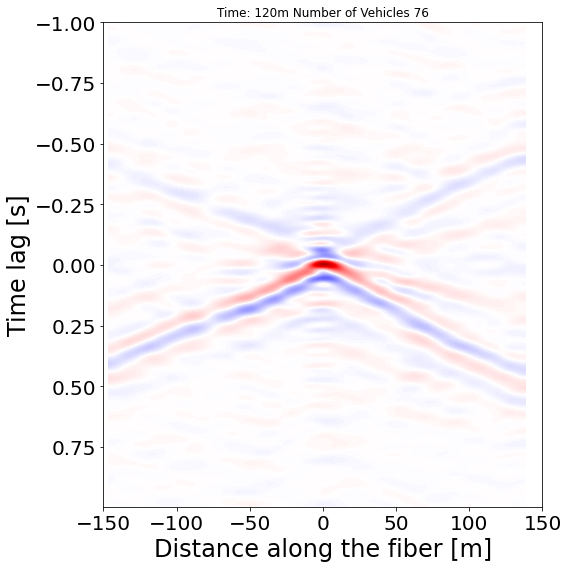

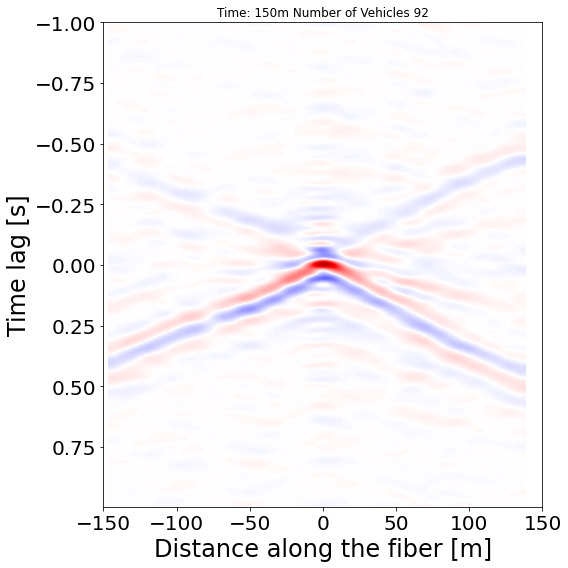

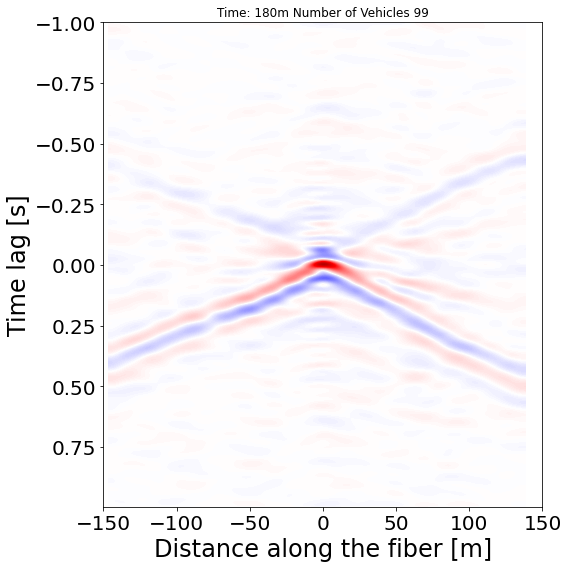

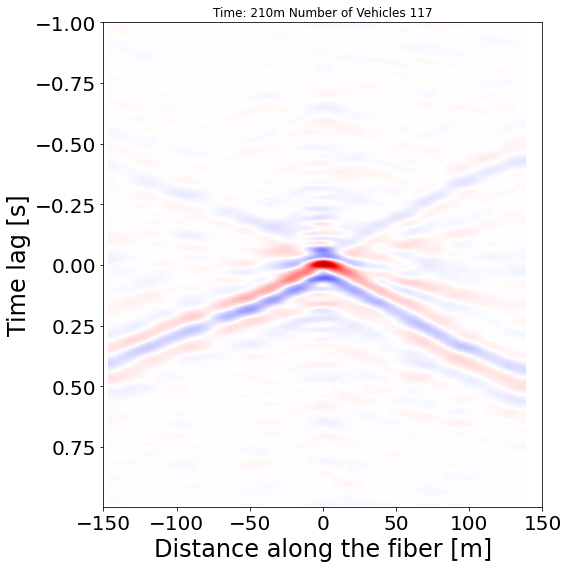

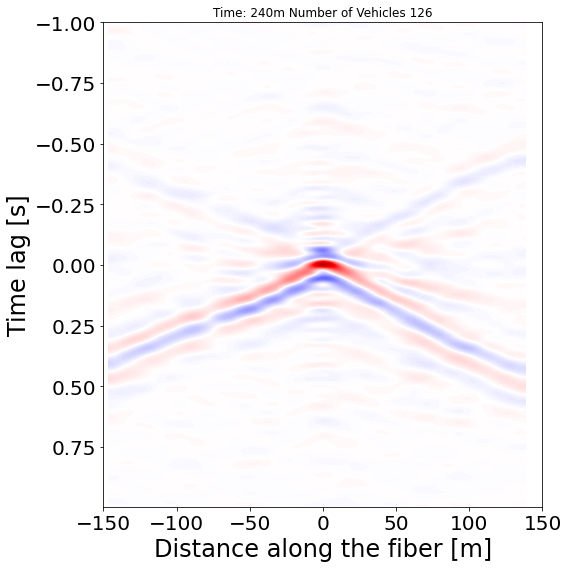

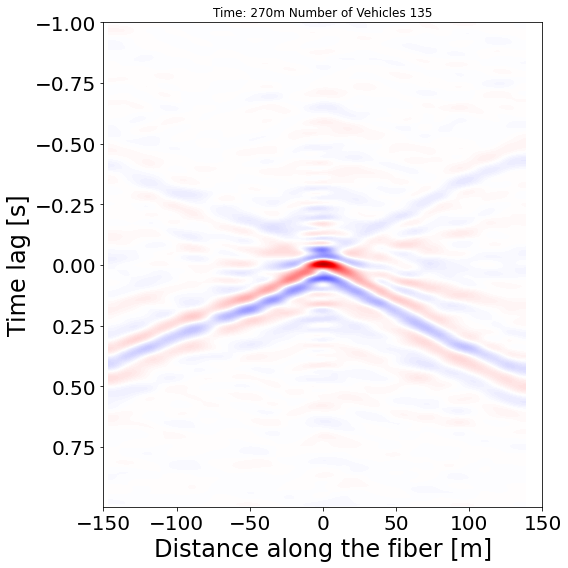

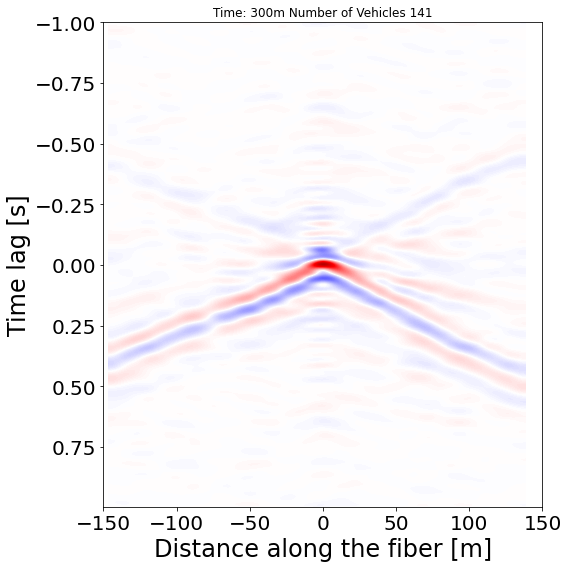

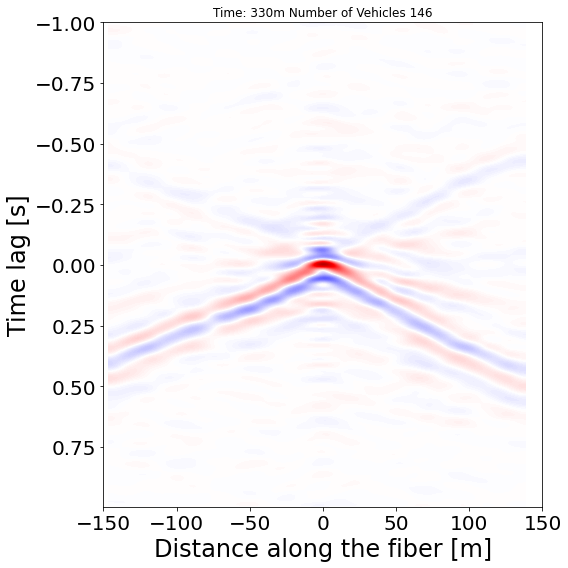

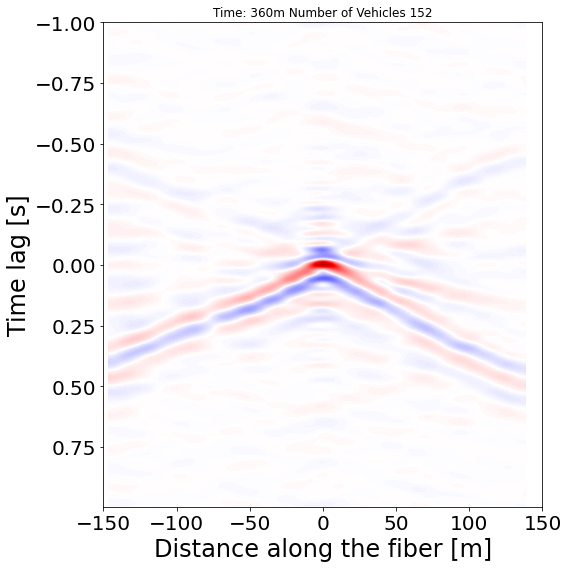

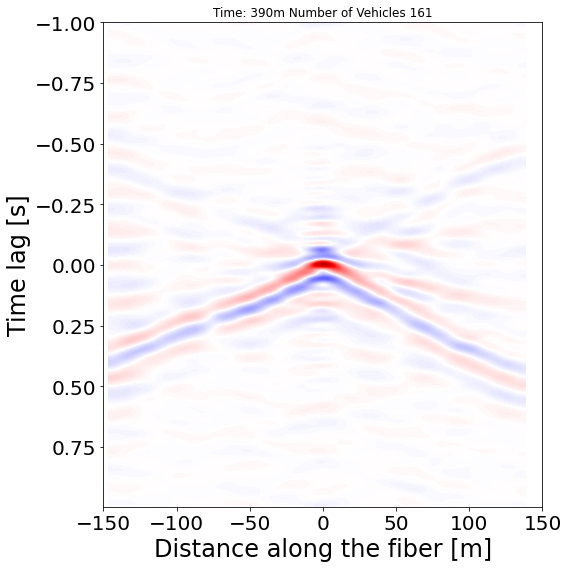

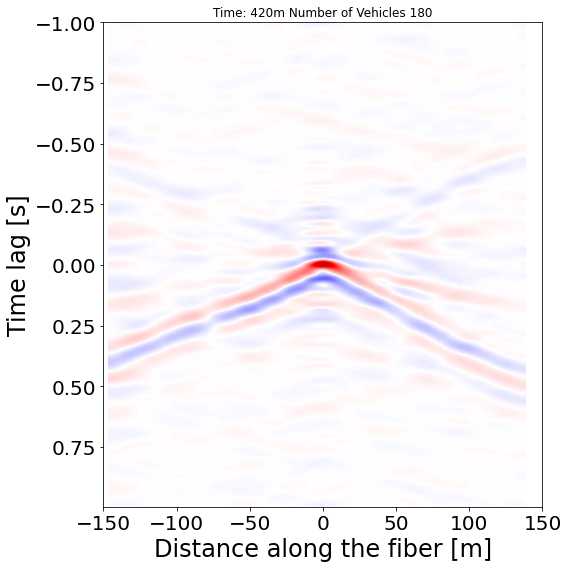

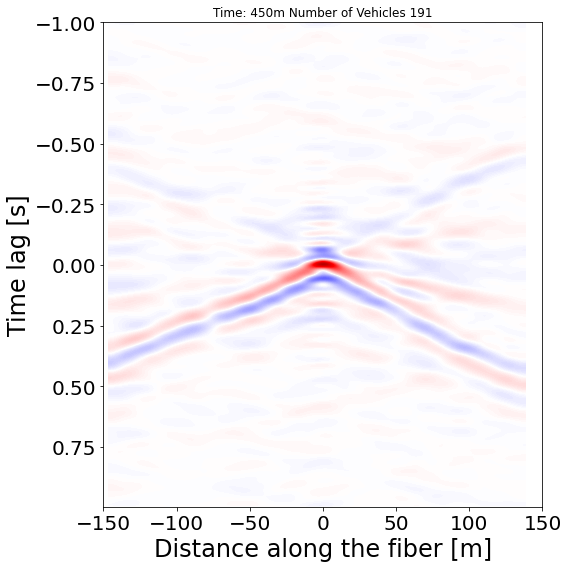

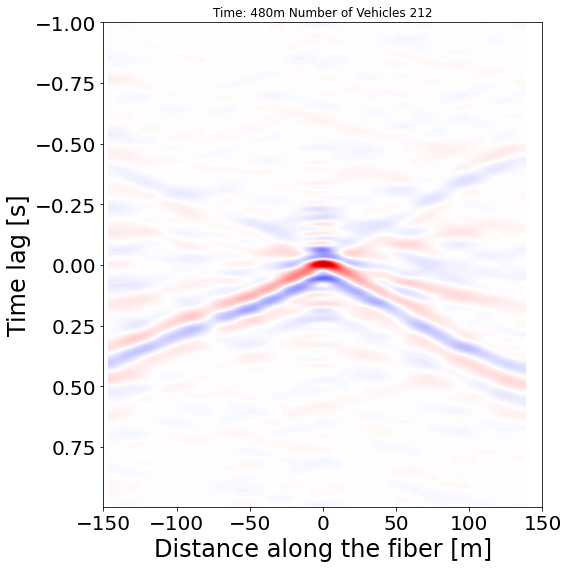

In [418]:
bifur_workflow.plot_intermediate_images()

In [1]:
from test_workflows import test_workflow_include_whole_data

In [19]:
test_workflow_include_whole_data("20221225", to_combine=True, num_to_stop=2)

NameError: name 'test_workflow_include_whole_data' is not defined

In [195]:
io = ImagingIO('20230103', smoothing=True)

In [196]:
data, x_axis, t_axis = io[20]

In [197]:
data

array([[-0.03844379, -0.03017582, -0.02104149, ..., -0.0639699 ,
        -0.05534821, -0.03854064],
       [ 0.00504652,  0.01510304,  0.02133156, ...,  0.01823584,
         0.01225117,  0.00641891],
       [-0.0385466 , -0.02498517, -0.008477  , ...,  0.03018181,
         0.0289873 ,  0.02691529],
       ...,
       [ 0.02962536,  0.02847671,  0.02940636, ...,  0.23105858,
         0.25089103,  0.270487  ],
       [ 0.05437151,  0.06106954,  0.06525217, ...,  0.21715875,
         0.22406273,  0.23407002],
       [ 0.06902315,  0.07091652,  0.06613586, ...,  0.21718505,
         0.21671237,  0.21956761]], dtype=float32)

In [198]:
imagingObj = TimeLapseImaging(data, x_axis, t_axis, method='xcorr')

tracking: 1.2832858562469482
1.7666289806365967


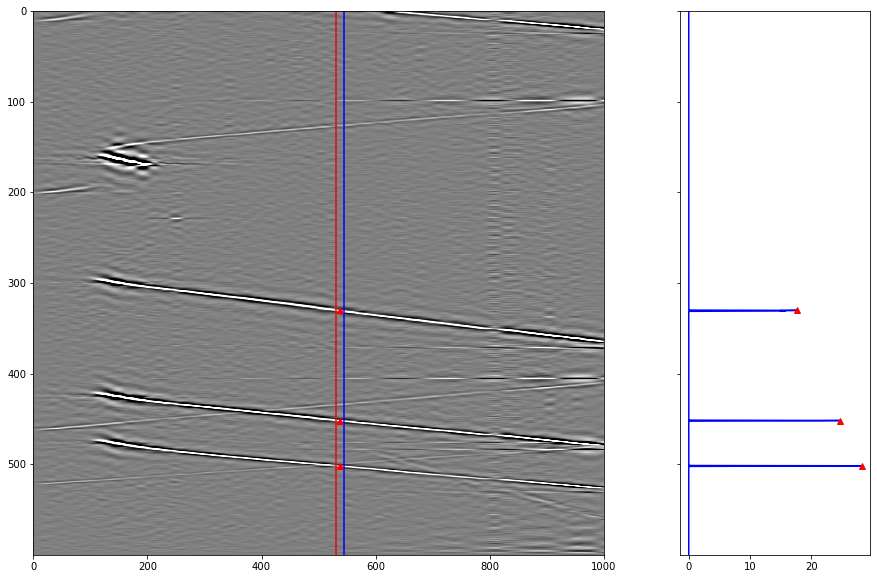

In [199]:
import time

tracking_args = {
    "detect":{
            "minprominence": 0.2,
            "minseparation": 40,
            "prominenceWindow": 600,
    }
}

st = time.time()
imagingObj.detect_cars(start_x=530, end_x=900, tracking_args=tracking_args)
print(time.time() - st)

In [182]:
imagingObj.select_surface_wave_windows(x0=700, wlen_sw=20, length_sw=500, spatial_ratio=0.5, temporal_spacing=25)

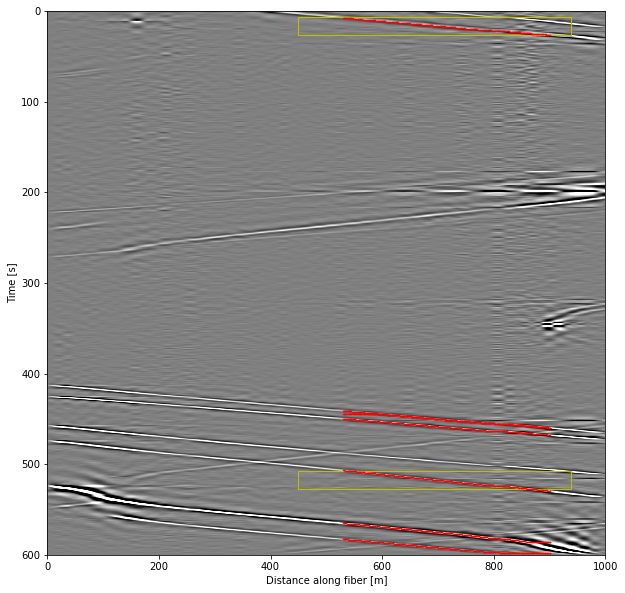

In [183]:
imagingObj.visualize_tracking(plt_tlim=600, plt_xlim=1000)

In [ ]:
run_workflow('20221225', )

In [5]:
workflow = ImagingWorkflowOneDirectory('20221225', method='xcorr', tracking_args=tracking_args)

In [18]:
workflow.imaging(start_x=530, end_x=900, x0=750, 
                 wlen_sw=25, length_sw=500, spatial_ratio=0.5, 
                 num_to_stop=None,
                 temporal_spacing=12,
                 imaging_kwargs={"pivot": 720, "start_x": 500, "end_x": 900, "wlen": 2,
                                "include_other_side": True})

working on window 0 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 9; accumulated isolated cars: 9...
computing disp images...
averaging...
time lapse:  56.95s
working on window 1 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 7; accumulated isolated cars: 16...
computing disp images...
averaging...
time lapse:  47.47s
working on window 2 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 4; accumulated isolated cars: 20...
computing disp images...
averaging...
time lapse:  53.61s
working on window 3 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 10; accumulated isolated cars: 30...
computing disp images...
averaging...
time lapse:  63.84s
working on window 4 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 9; accumulated isolated cars: 39...
computing disp images...
averaging...
time lapse:  58.35s


working on window 43 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
working on window 44 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 1; accumulated isolated cars: 157...
computing disp images...
averaging...
time lapse:  40.36s
working on window 45 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 5; accumulated isolated cars: 162...
computing disp images...
averaging...
time lapse:  46.07s
working on window 46 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 2; accumulated isolated cars: 164...
computing disp images...
averaging...
time lapse:  43.56s
working on window 47 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated cars: 5; accumulated isolated cars: 169...
computing disp images...
averaging...
time lapse:  51.88s
working on window 48 / 54, method=xcorr
detecting cars...
selecting surface-wave windows...
Isolated

In [19]:
workflow.plot_intermediate_images()

saving Fig/dispersion/20221225/vs_time_0m_nCars_9.png...
saving Fig/dispersion/20221225/disp_time_0m_nCars_9.png...
saving Fig/dispersion/20221225/vs_time_30m_nCars_20.png...
saving Fig/dispersion/20221225/disp_time_30m_nCars_20.png...
saving Fig/dispersion/20221225/vs_time_60m_nCars_42.png...
saving Fig/dispersion/20221225/disp_time_60m_nCars_42.png...
saving Fig/dispersion/20221225/vs_time_90m_nCars_64.png...
saving Fig/dispersion/20221225/disp_time_90m_nCars_64.png...
saving Fig/dispersion/20221225/vs_time_120m_nCars_78.png...
saving Fig/dispersion/20221225/disp_time_120m_nCars_78.png...
saving Fig/dispersion/20221225/vs_time_150m_nCars_96.png...
saving Fig/dispersion/20221225/disp_time_150m_nCars_96.png...
saving Fig/dispersion/20221225/vs_time_180m_nCars_104.png...
saving Fig/dispersion/20221225/disp_time_180m_nCars_104.png...
saving Fig/dispersion/20221225/vs_time_210m_nCars_114.png...
saving Fig/dispersion/20221225/disp_time_210m_nCars_114.png...
saving Fig/dispersion/20221225/v

In [16]:
avg_image = workflow.avg_image

In [17]:
avg_image.plot_image(fig_name="vs_pivot_700_combined.png")

saving /net/brick6/data5/syyuan/time_lapse_imaging/Fig/virtual_gathers/vs_pivot_700_combined.png...


In [1016]:
avg_image.save_to_npz(fname=f"1225_vs_pivot_700_combined", fdir='/net/brick6/data5/syyuan/time_lapse_imaging/Res/vs/channels/')

In [996]:
image = SurfaceWaveDispersion(window_muted, norm=False)

TypeError: _naive_disp() missing 2 required positional arguments: 'start_x' and 'end_x'

In [ ]:
image.plot_disp(norm=True, fig_name='disp_from_surfacewave.png', fig_dir='Fig/dispersion/test_xcorr/')

In [ ]:
xcorr, x_axis = construct_shot_gather(window_muted, pivot=635, wlen=8)
xcorr_normed = xcorr / np.linalg.norm(xcorr, axis=-1, keepdims=True)



In [ ]:
import utils

In [ ]:
utils.plot_xcorr(xcorr, window.t_axis[1] - window.t_axis[0], t_lim=4, x_axis=x_axis, figsize=(6, 10), cmap='seismic')

In [ ]:

freqs=np.arange(0.8, 20, 0.1)
vels=np.arange(200, 1200)
disp = Dispersion(xcorr, 8.16, window.t_axis[1] - window.t_axis[0],
                               freqs=freqs, vels=vels, norm=False)

In [ ]:
disp.plot_fv_map(norm=True, fig_name='disp_from_xcorr.png', fig_dir='Fig/dispersion/test_xcorr/')

## Test virtual shot gather class

In [ ]:
from virtual_shot_gather import VirtualShotGather

In [ ]:
vs = VirtualShotGather(window_muted)

In [ ]:
vs.plot_image()

In [ ]:
vs.compute_disp_image()

In [ ]:
vs.plot_disp()

In [ ]:
vs.save_to_npz('test_save_virtual_shot_gather.npz', fdir='test/')

In [ ]:
vs_reload = VirtualShotGather.get_VirtualShotGather_obj('test/', 'test_save_virtual_shot_gather.npz')

In [200]:
vs_reload.compute_disp_image(end_x=0, start_x=-150)

NameError: name 'vs_reload' is not defined

In [ ]:
vs_reload.plot_disp()

In [ ]:
vs_reload.save_disp_to_npz(fname='test_save_disp_from_vs.npz', fdir='test/')

In [ ]:
disp = Dispersion.get_dispersion_obj('test_save_disp_from_vs.npz', fdir='test/')

In [ ]:
disp.plot_fv_map(norm=False)

In [ ]:
vs_reload.plot_image(fig_name='vs_test_saving.png')